In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from csv
top250 = pd.read_csv('top250.csv')
top250 = top250[['Title', 'Year', 'Rating', 'Runtime', 'Genre', 'Director', 'Score', 'BoxOffice']]

In [3]:
print(f'The dataframe has {top250.shape[0]} rows and {top250.shape[1]} columns.')
top250.head()

The dataframe has 250 rows and 8 columns.


,Title,Year,Rating,Runtime,Genre,Director,Score,BoxOffice
0,The Shawshank Redemption,1994,R,142 min,Drama,Frank Darabont,9.3,"$28,767,189"
1,The Godfather,1972,R,175 min,"Crime, Drama",Francis Ford Coppola,9.2,"$136,381,073"
2,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",Christopher Nolan,9.0,"$534,987,076"
3,The Godfather Part II,1974,R,202 min,"Crime, Drama",Francis Ford Coppola,9.0,"$47,834,595"
4,12 Angry Men,1957,Approved,96 min,"Crime, Drama",Sidney Lumet,9.0,NaN


In [4]:
top250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      250 non-null    object 
 1   Year       250 non-null    int64  
 2   Rating     250 non-null    object 
 3   Runtime    250 non-null    object 
 4   Genre      250 non-null    object 
 5   Director   250 non-null    object 
 6   Score      250 non-null    float64
 7   BoxOffice  220 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.8+ KB


In [5]:
for char in [',', '$']:
    top250['BoxOffice'] = top250['BoxOffice'].str.replace(char, '')

top250['BoxOffice'] = top250['BoxOffice'].astype(float)
top250['BoxOffice'] = round(top250['BoxOffice'] * .000001)


top250['Runtime'] = top250['Runtime'].str.extractall('(\d+)').unstack()[0][0].astype(int)
top250.rename({'Runtime' : 'Runtime (in minutes)', 'BoxOffice': 'BoxOffice (in millions USD)'}, axis=1, inplace=True)

conditions = [
    (top250['Year'] >= 1920) & (top250['Year'] < 1930),
    (top250['Year'] >= 1930) & (top250['Year'] < 1940),
    (top250['Year'] >= 1940) & (top250['Year'] < 1950),
    (top250['Year'] >= 1950) & (top250['Year'] < 1960),
    (top250['Year'] >= 1960) & (top250['Year'] < 1970),
    (top250['Year'] >= 1970) & (top250['Year'] < 1980),
    (top250['Year'] >= 1980) & (top250['Year'] < 1990),
    (top250['Year'] >= 1990) & (top250['Year'] < 2000),
    (top250['Year'] >= 2000) & (top250['Year'] < 2010),
    (top250['Year'] >= 2010) & (top250['Year'] < 2020),
    top250['Year'] >= 2020
]

values = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
top250['Decade'] = np.select(conditions, values)

/var/folders/sb/ps31m43x4gn1g03b1f4nwgt40000gn/T/ipykernel_18233/1922668002.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top250['BoxOffice'] = top250['BoxOffice'].str.replace(char, '')


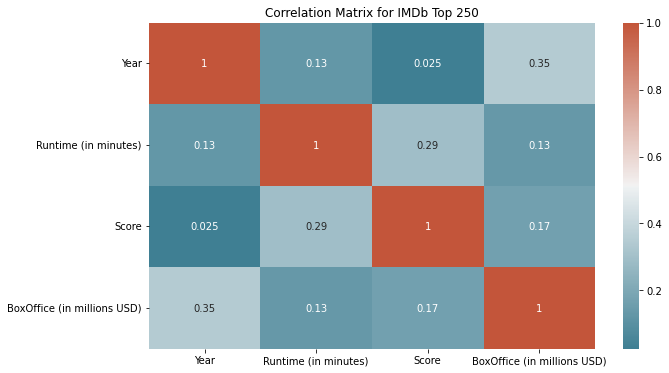

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(top250.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True)
plt.title('Correlation Matrix for IMDb Top 250')
plt.yticks(rotation = 0)
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

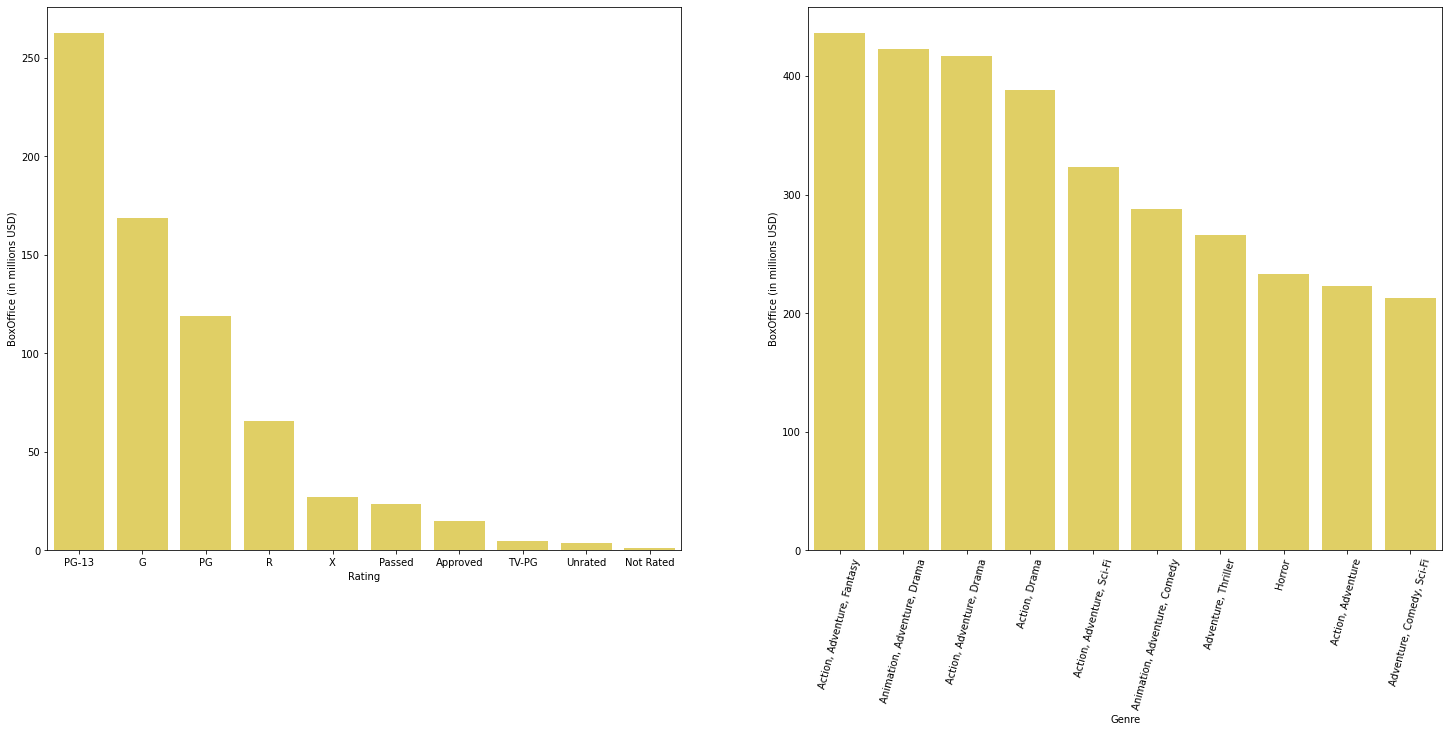

In [7]:
fig, axes = plt.subplots(1,2, figsize=(25,10))
sns.barplot(x='Rating', y='BoxOffice (in millions USD)', data=top250.groupby('Rating').mean().reset_index().sort_values(by='BoxOffice (in millions USD)', ascending=False).head(10), color='#F5DE50',ci=None, ax=axes[0])
sns.barplot(x='Genre', y='BoxOffice (in millions USD)', data=top250.groupby('Genre').mean().reset_index().sort_values(by='BoxOffice (in millions USD)', ascending=False).head(10), color='#F5DE50',ci=None, ax=axes[1])
plt.xticks(rotation=75)
plt.show

<AxesSubplot:xlabel='Year', ylabel='BoxOffice (in millions USD)'>

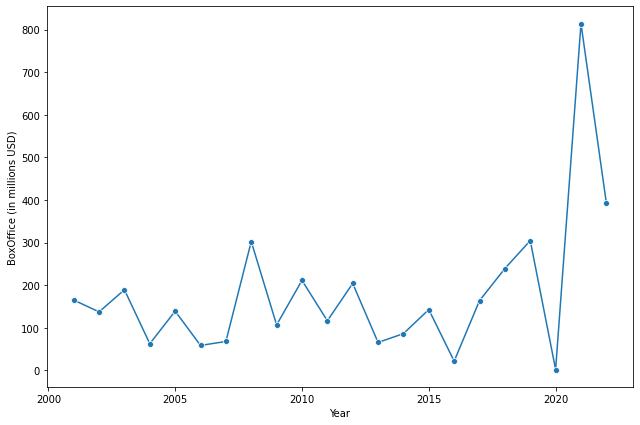

In [8]:
plt.figure(figsize=(10.5,7))
sns.lineplot(x='Year', y='BoxOffice (in millions USD)', data=top250[top250['Year'] > 2000], ci=None, marker='o')

<AxesSubplot:xlabel='Decade', ylabel='BoxOffice (in millions USD)'>

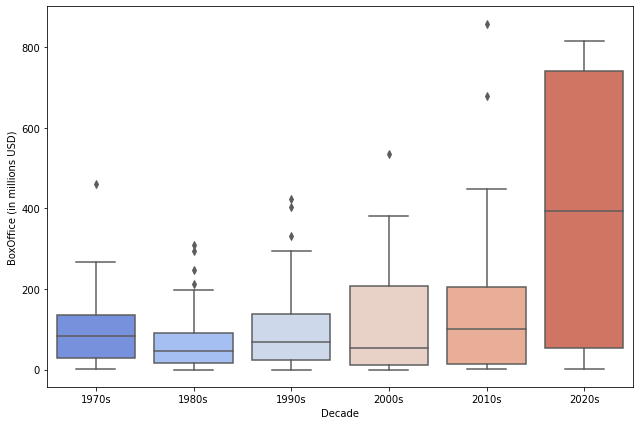

In [9]:
plt.figure(figsize=(10.5,7))
sns.boxplot(x='Decade', y='BoxOffice (in millions USD)', 
data=top250.loc[top250['Decade'].isin(top250.groupby('Decade').mean().sort_values(by='BoxOffice (in millions USD)', ascending=False).head(6).reset_index()['Decade'])],
order=['1970s', '1980s', '1990s', '2000s', '2010s', '2020s'],
palette='coolwarm')

<AxesSubplot:xlabel='Score', ylabel='BoxOffice (in millions USD)'>

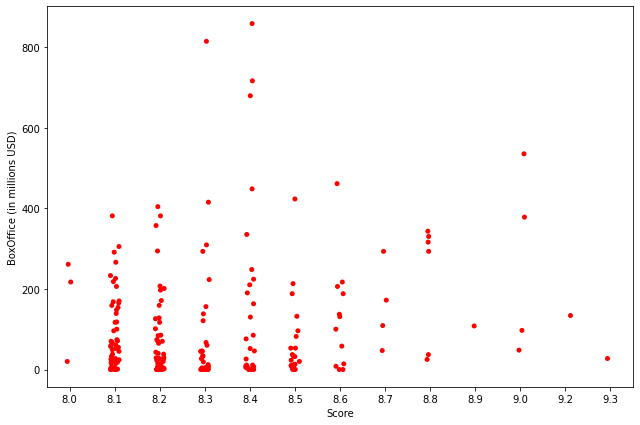

In [10]:
plt.figure(figsize=(10.5,7))
sns.stripplot(x='Score', y='BoxOffice (in millions USD)', data=top250, color='red')

In [11]:
top250.to_csv('top250.csv', sep=',')